In [1]:
import turicreate


In [3]:
sales = turicreate.SFrame('Philadelphia_Crime_Rate_noNA.csv')

Finished parsing file /home/ebishpr/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.619574 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 99 lines. Lines per second: 869.412

Finished parsing file /home/ebishpr/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.125325 secs.

In [4]:
sales.head()

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [5]:
turicreate.show(sales['CrimeRate'],sales['HousePrice'])

Materializing X axis SArray

Materializing Y axis SArray

In [13]:
crime_model= turicreate.linear_regression.create(sales,
                                               target="HousePrice",
                                               features=['CrimeRate'],
                                               validation_set=None,
                                               verbose=False)

In [19]:
import matplotlib as plt
%matplotlib inline

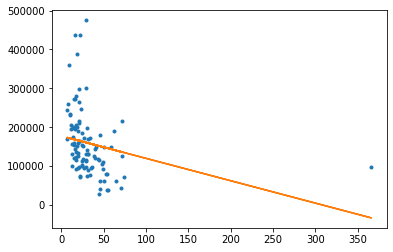

In [23]:
plt.pyplot.plot(sales['CrimeRate'],sales['HousePrice'], '.',
         sales['CrimeRate'],crime_model.predict(sales),'-')

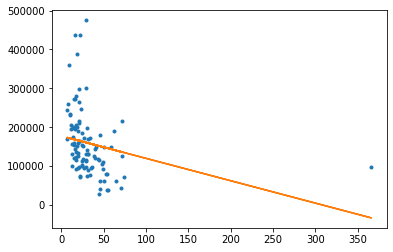

In [25]:
plt.pyplot.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(sales),'-')

In [26]:
sales_noCC = sales[sales['MilesPhila'] != 0.0] 

In [27]:
sales_noCC

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [29]:
turicreate.show(sales_noCC['CrimeRate'],sales_noCC['HousePrice'])

Materializing X axis SArray

Materializing Y axis SArray

In [30]:
crime_model_noCC = turicreate.linear_regression.create(
    sales_noCC,
    target='HousePrice',
    features=['CrimeRate'],
    validation_set = None,
    verbose = False
)

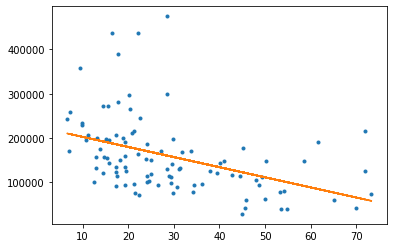

In [31]:
plt.pyplot.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
         sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')

In [32]:
crime_model.coefficients

name,index,value,stderr
(intercept),None,176626.04688088188,11245.588219378817
CrimeRate,None,-576.8049490581087,226.90225950965336


In [33]:
crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309863,16404.024751386663
CrimeRate,None,-2287.6971744329007,491.5374781230899


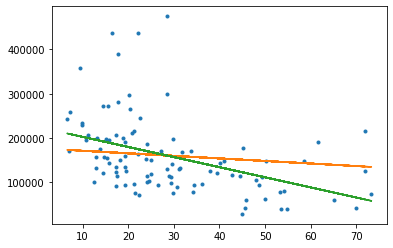

In [35]:
plt.pyplot.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
         sales_noCC['CrimeRate'], crime_model.predict(sales_noCC), '-',
         sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')